Fold 1:
1회: theta0 = 32.305, theta1 = -4.701, 차이 = 824714.6277
2회: theta0 = 61.445, theta1 = -8.369, 차이 = 165134.5449
3회: theta0 = 88.167, theta1 = -11.114, 차이 = 138215.2994
4회: theta0 = 112.687, theta1 = -13.051, 차이 = 115936.9137
5회: theta0 = 135.199, theta1 = -14.285, 차이 = 97472.6428
6회: theta0 = 155.882, theta1 = -14.909, 차이 = 82145.6826
7회: theta0 = 174.895, theta1 = -15.005, 차이 = 69401.7197
8회: theta0 = 192.385, theta1 = -14.647, 차이 = 58786.5303
9회: theta0 = 208.484, theta1 = -13.900, 차이 = 49927.6980
10회: theta0 = 223.313, theta1 = -12.822, 차이 = 42519.6912
11회: theta0 = 236.981, theta1 = -11.465, 차이 = 36311.6801
12회: theta0 = 249.587, theta1 = -9.874, 차이 = 31097.5898
13회: theta0 = 261.223, theta1 = -8.088, 차이 = 26707.9764
14회: theta0 = 271.969, theta1 = -6.145, 차이 = 23003.3911
15회: theta0 = 281.902, theta1 = -4.074, 차이 = 19868.9586
16회: theta0 = 291.089, theta1 = -1.904, 차이 = 17209.9467
17회: theta0 = 299.592, theta1 = 0.342, 차이 = 14948.1436
18회: theta0 = 307.468, theta1 = 2.643, 차

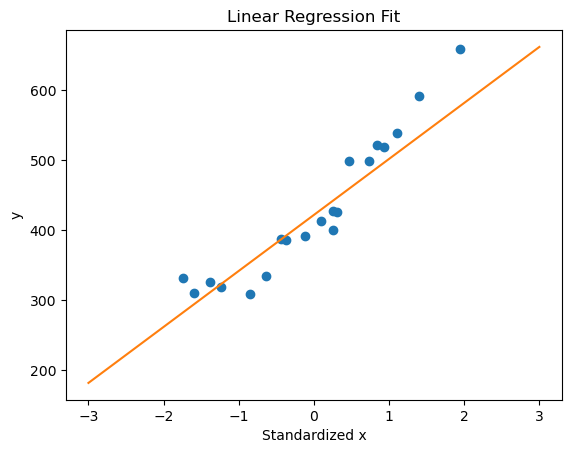

In [6]:
"""
이 코드는 학습률을 더 크게 조정하고, 최대 반복 횟수를 늘려서 더 많은 학습을 진행하도록 하였습니다. 
이러한 변경 사항은 폴드 1, 4, 5에서 오차를 줄이는 데 도움을 줄 수 있습니다.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# 데이터 파일 경로 설정
file_path = 'click.csv'

try:
    # 학습 데이터 로드
    train = np.loadtxt(file_path, delimiter=',', dtype='int', skiprows=1)
    train_x = train[:, 0]
    train_y = train[:, 1]
except Exception as e:
    print(f"Error loading data from {file_path}: {e}")
    exit(1)

# 파라미터 초기화
theta0 = np.random.rand()
theta1 = np.random.rand()

# 예측 함수 정의
def f(x):
    return theta0 + theta1 * x

# 목적 함수 정의 (오차 계산)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 표준화 함수 정의
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 학습률 및 초기 설정
ETA = 5e-3  # 학습률을 더 크게 조정
max_iterations = 10000  # 최대 반복 횟수를 늘림
diff = 1
count = 0
error = E(train_z, train_y)

# k-fold 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_idx = 1

# 교차 검증 반복
for train_idx, val_idx in kfold.split(train_z):
    print(f"Fold {fold_idx}:")

    # 훈련 세트와 검증 세트 준비
    train_z_fold, val_z_fold = train_z[train_idx], train_z[val_idx]
    train_y_fold, val_y_fold = train_y[train_idx], train_y[val_idx]

    # 학습 반복 (최대 반복 횟수까지 또는 에러가 0.01 이하가 될 때까지)
    while diff > 1e-2 and count < max_iterations:
        try:
            # 파라미터 업데이트
            tmp_theta0 = theta0 - ETA * np.sum((f(train_z_fold) - train_y_fold))
            tmp_theta1 = theta1 - ETA * np.sum((f(train_z_fold) - train_y_fold) * train_z_fold)

            # 파라미터 값 업데이트
            theta0, theta1 = tmp_theta0, tmp_theta1

            # 새로운 에러 계산
            current_error = E(train_z_fold, train_y_fold)
            diff = error - current_error
            error = current_error

            # 학습 로그 출력
            count += 1
            log = '{}회: theta0 = {:.3f}, theta1 = {:.3f}, 차이 = {:.4f}'
            print(log.format(count, theta0, theta1, diff))
        except OverflowError as e:
            print(f"Overflow error: {e}")
            break
        except Exception as e:
            print(f"An error occurred: {e}")
            break

    # 검증 세트에 대한 성능 평가
    val_error = E(val_z_fold, val_y_fold)
    print(f"Validation error for fold {fold_idx}: {val_error}\n")

    # fold 인덱스 증가
    fold_idx += 1

# 최종 학습 결과 시각화
try:
    x = np.linspace(-3, 3, 100)
    plt.plot(train_z, train_y, 'o')
    plt.plot(x, f(x))
    plt.xlabel('Standardized x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")
